In [335]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/drive/MyDrive/DATASETS/UCI_Credit_Card.csv.zip

Archive:  /content/drive/MyDrive/DATASETS/UCI_Credit_Card.csv.zip
  inflating: UCI_Credit_Card.csv     


In [4]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
#Finding sum of null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Inference:
   
   There is no null values in the given data.

# **Exploratory Data Analysis -EDA**

In [7]:
data = df.copy()

In [8]:
#change numerical to text data for Columns 
data["SEX"] = data["SEX"].replace({1:'Male', 2:'Female'})
data['EDUCATION'] = data["EDUCATION"].replace({1:'Graduate School', 2:'University', 3:'High School', 4:'Others',
5:'Unknown', 6:'Unknown'})
data["MARRIAGE"] = data["MARRIAGE"].replace({1:'Married', 2:'Single', 3:'Others'})
data["default.payment.next.month"] = data["default.payment.next.month"].replace({1:'Yes', 0:'No'})

In [9]:
#data after changing to categorical format
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,Male,High School,Married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,No
29996,29997,150000.0,Male,High School,Single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,No
29997,29998,30000.0,Male,University,Single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,Yes
29998,29999,80000.0,Male,High School,Married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


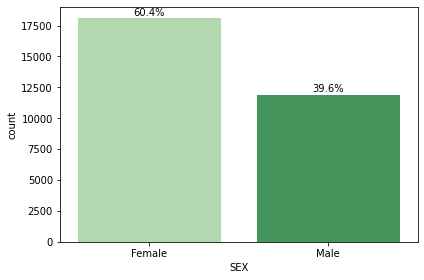

<Figure size 1008x1008 with 0 Axes>

In [124]:
#Calculating total number of credit card user in accordance with the gender
ax =sns.countplot(data.SEX,palette="Greens")

total = len(data. SEX)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.figure(figsize=(14,14))
plt.show()

Inference:

         More than 60% of credit card holder comes under Female Category whereas 39.6%  are comes under Male category.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


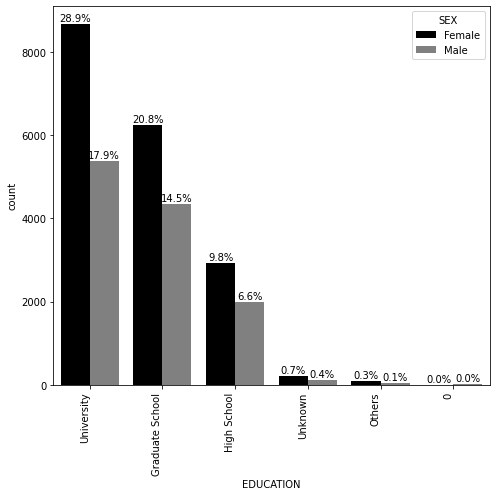

In [113]:
#Credit card user in respect with their education
plt.figure(figsize=(7,7))
ax =sns.countplot(data.EDUCATION, hue=data.SEX, palette=['black', 'grey'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

total = len(data.EDUCATION)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### **Inference:**

    1. Most of the credit card holders are those who attend University or University Graduated.
    2. 35.3% are credit card holder are School Graduated and there is less difference in percentage with the University.
    3. In every aspects of education Females holds the higher percentage compared to Male.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


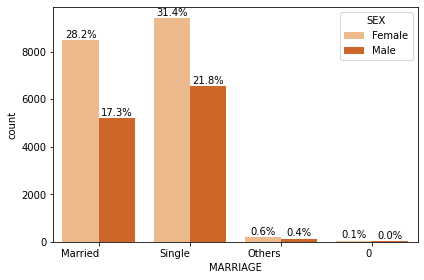

<Figure size 1008x1008 with 0 Axes>

In [125]:
#credit card user irrespective of marital status
ax =sns.countplot(data.MARRIAGE, hue=data.SEX,palette='Oranges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")

total = len(data.MARRIAGE)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.figure(figsize=(14,14))
plt.show()

### **Inference:**
     
      1. Unmarried seems to be the high count of holding the credit card wheresas married is of 45.5% of having credit card.
      2. On the whole Females holds higher percentage in all aspects of having Credit Card.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


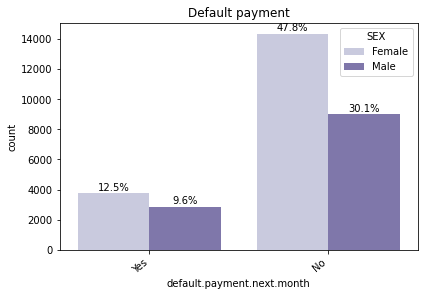

<Figure size 1008x1008 with 0 Axes>

In [126]:
#Default payment vs sex
ax =sns.countplot(data['default.payment.next.month'], hue=data.SEX, palette='Purples')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(data['default.payment.next.month'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.title("Default payment")
plt.figure(figsize=(14,14))
plt.show()

### **Inference:**

   1. Non Default payment next month has higher percentage since most people pay credit cards on time.
   2. Non Default payment have a higher proportion of Females. 
   3. only 22% of people have co,e under default payment next month, or paying their credit beyond the deadline.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


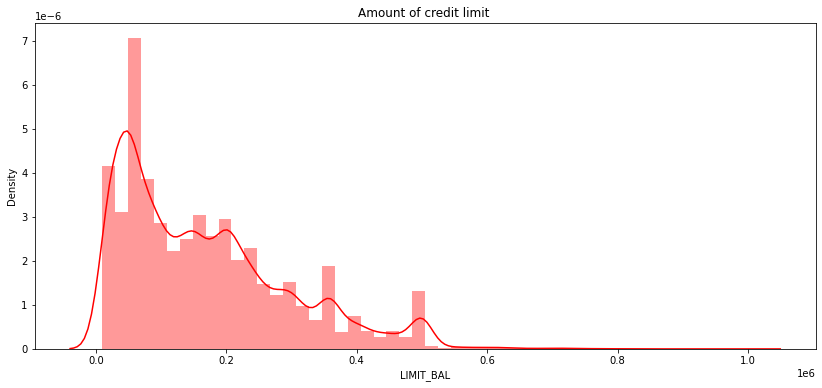

In [127]:
#Credit card limit
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit ')
sns.set_color_codes("pastel")
sns.distplot(data['LIMIT_BAL'],kde=True, color="RED")
plt.show()

In [68]:
data['LIMIT_BAL'].value_counts().head()

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

### **Inference:**
   1. Large number of credit card limit will be apparently  amount of 50k about 3365 credit card limit falls under 50k.
   2. In which 1976 numbers of credit card comes under limit of 20k.
   3. Least Number of credit card limit is about 2Lakhs.


Text(0, 0.5, 'Frequency')

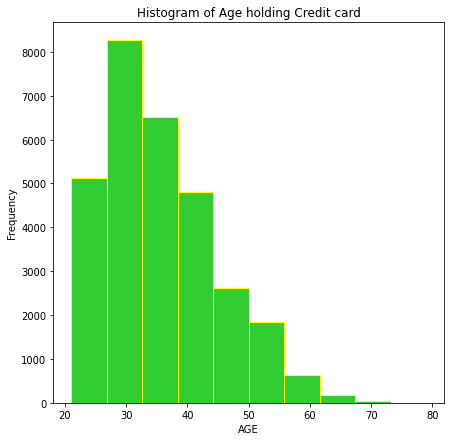

In [132]:
#Credit card user with age 
plt.figure(figsize=(7,7))
plt.hist(data['AGE'],color='limegreen',edgecolor = 'yellow')
plt.title('Histogram of Age holding Credit card')

plt.xlabel('AGE')
plt.ylabel('Frequency')

### **Inference:**

     1. High amount of Credit Card users are the mid aged people ranges from 27 to 40.
    2. Least Credit card users are of aged people ranges from 60 to 70. 

### **Correlation**

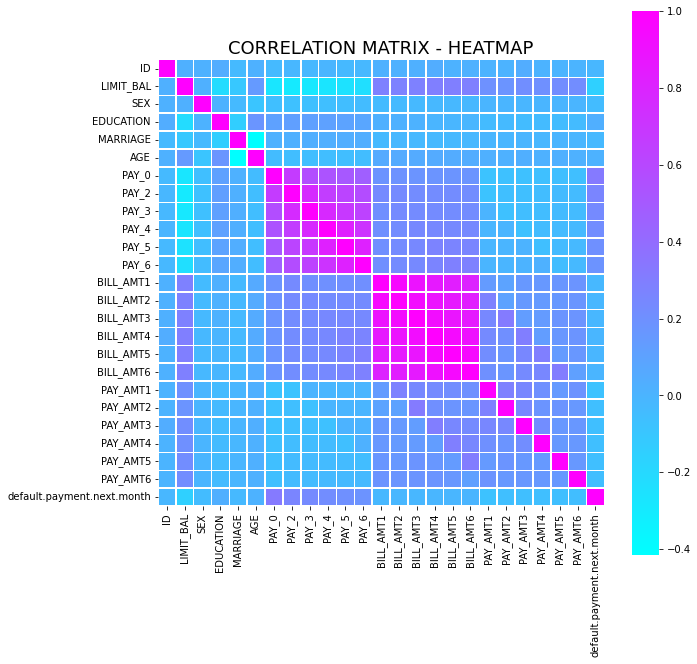

In [109]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="cool", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

### **Inference:**
    
    1. Features are mostly correlated with each other.
    2. Variables such as PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6 are the strongest predictors of default.
    3. Correlation is in positive.

# **MACHINE LEARNING**

##Spliting the data into train and test sets

In [133]:
X = df.drop(columns=['default.payment.next.month'])
Y = df["default.payment.next.month"]

In [226]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=12)

## **Logistic Regression**

In [247]:
regressor = LogisticRegression()

In [248]:
regressor.fit(x_train,y_train)
y_pred = regressor.predict( x_test )
LRScore = accuracy_score(y_pred,y_test)*100
print("Accuracy Score for Logistic Regression is :", LRScore)

Accuracy Score for Logistic Regression is : 81.08333333333333


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

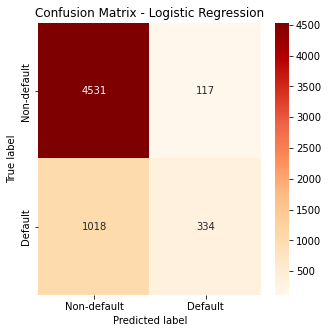

In [249]:
plt.figure(figsize=(5,5))
ConfMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="OrRd", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression")

In [250]:
print("LOGISTIC REGRESSION")
print(classification_report(y_test, y_pred))


LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4648
           1       0.74      0.25      0.37      1352

    accuracy                           0.81      6000
   macro avg       0.78      0.61      0.63      6000
weighted avg       0.80      0.81      0.77      6000



## **INFERENCE:**

    Performance of Logistic Regression is good with Accuracy Score of 81%.
    Model is able to predict default with recall of 0.25.

## **K Nearest Neighbors**

In [251]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [252]:
y_predict = model.predict(x_test)
KNNScore = accuracy_score(y_predict,y_test)*100
print("Accuracy Score for K Nearest Neighbors is:", KNNScore)

Accuracy Score for K Nearest Neighbors is: 79.01666666666667


Text(0.5, 1.0, 'Confusion Matrix - K Nearest Neighbors')

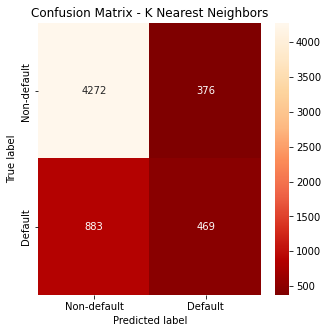

In [260]:
plt.figure(figsize=(5,5))
ConfMatrix = confusion_matrix(y_test,y_predict)
sns.heatmap(ConfMatrix,annot=True, cmap="OrRd_r", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - K Nearest Neighbors")

In [253]:
print("K NEAREST NEIGHBORS")
print(classification_report(y_test, y_predict))

K NEAREST NEIGHBORS
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4648
           1       0.56      0.35      0.43      1352

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.79      0.77      6000



## **INFERENCE:**

    Overall accuracy of the model is decreased for K Nearest Neighbor as compared to previous model.
    Slight increase in the recall about 0.35.


## **Decision Tree Classifier**

In [258]:
tree=DecisionTreeClassifier()
 
tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [259]:
ypredict=tree.predict(x_test)
DTCScore = accuracy_score(ypredict,y_test)*100
print("Accuracy Score for Decision Tree Classifier is:", DTCScore)


Accuracy Score for Decision Tree Classifier is: 72.0


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree Classifier')

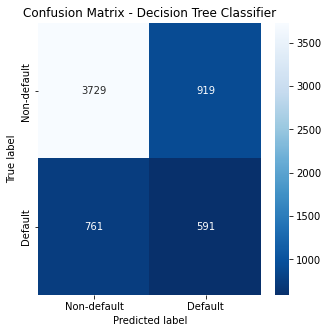

In [263]:
plt.figure(figsize=(5,5))
ConfMatrix = confusion_matrix(y_test,ypredict)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues_r", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree Classifier")

In [262]:
print("DECSION TREE CLASSIFIER")
print(classification_report(y_test, ypredict))

DECSION TREE CLASSIFIER
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      4648
           1       0.39      0.44      0.41      1352

    accuracy                           0.72      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.73      0.72      0.73      6000



## **INFERENCE:**
   
    Overall accuracy score for Decision Tree Classifier is about 72%.
    Whereas the recall for the model has been increased about 0.44.

## **Support Vector Machine**

In [267]:
vector= svm.SVC(kernel='rbf', gamma='scale')
vector.fit(x_train, y_train)



SVC()

In [270]:
pred_y = vector.predict(x_test)
SVMScore = accuracy_score(pred_y,y_test)*100
print("Accuracy Score for Support Vector Machine is:", SVMScore)

Accuracy Score for Support Vector Machine is: 81.83333333333334


Text(0.5, 1.0, 'Confusion Matrix - Support Vector Machine')

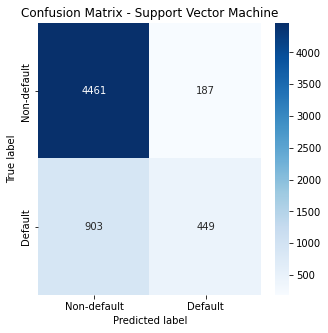

In [271]:
plt.figure(figsize=(5,5))
ConfMatrix = confusion_matrix(y_test,pred_y)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Support Vector Machine")

In [272]:
print("SUPPORT VECTOR MACHINE")
print(classification_report(y_test, pred_y))

SUPPORT VECTOR MACHINE
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4648
           1       0.71      0.33      0.45      1352

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



## **INFERENCE:**
   
    Accuracy of the model for Support Vector Machine is 82% which is greater than all the previous model.
    Predicted value for default is decreased.

# **ADA Boost**

In [275]:
boost=AdaBoostClassifier(n_estimators=100,random_state=10)

boost.fit(x_train,y_train)



AdaBoostClassifier(n_estimators=100, random_state=10)

In [276]:
y_pr=boost.predict(x_test)
ADABScore = accuracy_score(y_pr,y_test)*100
print("Accuracy Score for ADA Boost is:", ADABScore)

Accuracy Score for ADA Boost is: 81.46666666666667


Text(0.5, 1.0, 'Confusion Matrix - ADA Boost')

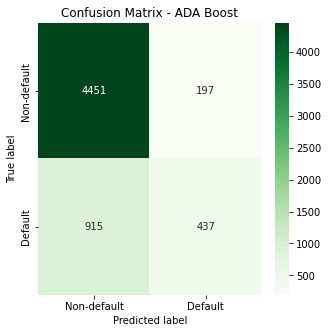

In [277]:
plt.figure(figsize=(5,5))
ConfMatrix = confusion_matrix(y_test,y_pr)
sns.heatmap(ConfMatrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - ADA Boost")

In [278]:
print("ADA BOOST")
print(classification_report(y_test, y_pr))


ADA BOOST
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4648
           1       0.69      0.32      0.44      1352

    accuracy                           0.81      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.81      0.79      6000



## **INFERENCE:**
  
    Accuracy for ADA Boost is about 81.46%.
    Predicted value for default is slightly decreased compared to Support Vector Machine.

## **Gradient Boosting Classifier**

In [280]:
booster = GradientBoostingClassifier()
booster.fit(x_train,y_train)


GradientBoostingClassifier()

In [284]:
y_hat=booster.predict(x_test)
GBCScore = accuracy_score(y_test,y_hat)*100
print("Accuracy Score for Gradient Boosting Classifier:", GBCScore)

Accuracy Score for Gradient Boosting Classifier: 82.25


Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting Classifier')

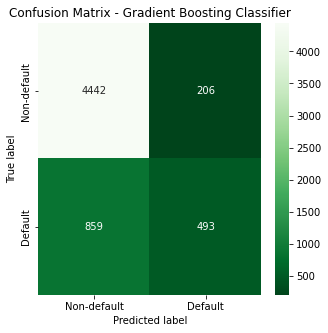

In [285]:
plt.figure(figsize=(5,5))
ConfMatrix = confusion_matrix(y_test,y_hat)
sns.heatmap(ConfMatrix,annot=True, cmap="Greens_r", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Gradient Boosting Classifier")

In [286]:
print("GRADIENT BOOSTING CLASSIFIER")
print(classification_report(y_test, y_hat))

GRADIENT BOOSTING CLASSIFIER
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4648
           1       0.71      0.36      0.48      1352

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



## **INFERENCE:**

    Overall accuracy for Gradient Bossting Classifier is 82.25%.
    

## **Random Forest Classifier**

In [282]:
classifier=RandomForestClassifier(n_estimators=200)
classifier.fit(x_train,y_train)


RandomForestClassifier(n_estimators=200)

In [287]:
ypred=classifier.predict(x_test)
RFCScore = accuracy_score(ypred,y_test)*100
print("Accuracy Score for Random Forest Classifier:", RFCScore)

Accuracy Score for Random Forest Classifier: 81.73333333333333


Text(0.5, 1.0, 'Confusion Matrix - Random Forest Classifier')

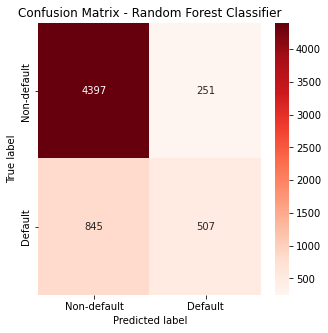

In [289]:
plt.figure(figsize=(5,5))
ConfMatrix = confusion_matrix(y_test,ypred)
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest Classifier")

In [255]:
print("RANDOM FOREST CLASSIFIER")
print(classification_report(y_test, ypred))
print()

RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4648
           1       0.63      0.32      0.43      1352

    accuracy                           0.80      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000




## **INFERENCE:**
    
    Overall accuracy obtained from Random Forest Classifier is 80%. 
    Model is biased towards 0 i.e Non Default Payment, may be due to the imbalanced dataset.

# **Finding the best Model**

In [291]:
print("Accuracy Score for Decision Tree Classifier is:", DTCScore)
print("Accuracy Score for K Nearest Neighbors is:", KNNScore)
print("Accuracy Score for Logistic Regression is :", LRScore)
print("Accuracy Score for Random Forest Classifier:", RFCScore)
print("Accuracy Score for Support Vector Machine is:", SVMScore)
print("Accuracy Score for ADA Boost is:", ADABScore)
print("Accuracy Score for Gradient Boosting Classifier:", GBCScore)

Accuracy Score for Decision Tree Classifier is: 72.0
Accuracy Score for K Nearest Neighbors is: 79.01666666666667
Accuracy Score for Logistic Regression is : 81.08333333333333
Accuracy Score for Random Forest Classifier: 81.73333333333333
Accuracy Score for Support Vector Machine is: 81.83333333333334
Accuracy Score for ADA Boost is: 81.46666666666667
Accuracy Score for Gradient Boosting Classifier: 82.25


## **INFERENCE:**

    Using Gradient Boosting classifier, we can predict with ~82.25% accuracy, whether a customer is likely to default next month.
    Least model accuracy is obtained from Decision Tree Classifier.

## **Feature Importance Score**

In [314]:
feature_scores = pd.Series(booster.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

PAY_0        60.883120
PAY_2         8.942055
BILL_AMT1     3.663313
PAY_3         3.494628
LIMIT_BAL     2.737531
PAY_AMT1      2.289751
PAY_AMT3      2.200078
PAY_AMT2      2.083978
PAY_6         1.827041
PAY_4         1.677473
PAY_5         1.515921
ID            1.078880
PAY_AMT6      0.896732
PAY_AMT4      0.846583
AGE           0.805816
EDUCATION     0.795620
BILL_AMT4     0.792369
BILL_AMT2     0.773898
BILL_AMT5     0.641413
BILL_AMT3     0.568139
BILL_AMT6     0.515299
PAY_AMT5      0.382996
MARRIAGE      0.375969
SEX           0.211398
dtype: float64

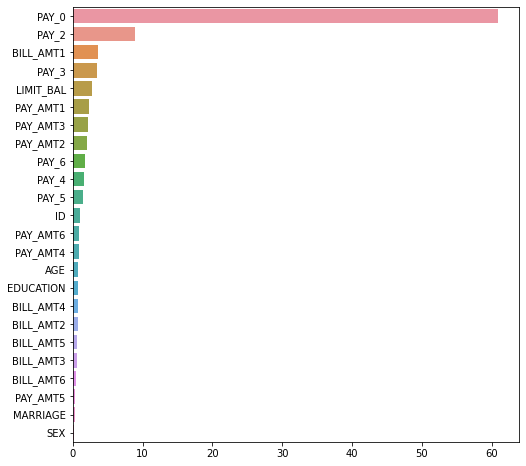

In [315]:
plt.figure(figsize=(8,8))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

## **INFERENCE:**

    PAY_0, PAY_2 has the highest score in Feature Importance to Predict the default payment next month.
    Marriage and Sex is the most least Important Feature compared to other variables

# **Training the best model with feature importance**

In [316]:
important_features=feature_scores.loc[feature_scores >2]
important_features

PAY_0        60.883120
PAY_2         8.942055
BILL_AMT1     3.663313
PAY_3         3.494628
LIMIT_BAL     2.737531
PAY_AMT1      2.289751
PAY_AMT3      2.200078
PAY_AMT2      2.083978
dtype: float64

In [317]:
x=df[important_features.index]

In [332]:
X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.2, random_state=10)

In [333]:
new_model = GradientBoostingClassifier()
new_model.fit(X_train,y_train)


GradientBoostingClassifier()

In [334]:
yPredicted=new_model.predict(X_test)
GBC_AccuracyScore = accuracy_score(y_test,yPredicted)*100
print("Accuracy Score for Gradient Boosting Classifier:", GBC_AccuracyScore)

Accuracy Score for Gradient Boosting Classifier: 82.31666666666668


# **INFERENCE:**
    By taking important Feature with the score we can achieve Overall Accuracy for Gradient Boosting Classifier is 82.3%
    Which also enhance to maintain Strong Correlation with  Target the Default Payment next month.